# Business Case: Walmart - Confidence Intervals and Central Limit Theorem

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# set color palette and style
sns.set_palette('pastel')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Analyzing Basic Metrics and Info

In [5]:
df.shape

(550068, 10)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


In [7]:
df['Occupation'] = df['Occupation'].astype('object')
df['Marital_Status'] = df['Marital_Status'].astype('object')
df['Product_Category'] = df['Product_Category'].astype('object')

In [8]:
df.drop('User_ID', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Product_ID                  550068 non-null  object
 1   Gender                      550068 non-null  object
 2   Age                         550068 non-null  object
 3   Occupation                  550068 non-null  object
 4   City_Category               550068 non-null  object
 5   Stay_In_Current_City_Years  550068 non-null  object
 6   Marital_Status              550068 non-null  object
 7   Product_Category            550068 non-null  object
 8   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 37.8+ MB


In [10]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [11]:
df.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


`There are no null values`

# Univariate and Multivariate Analysis

In [12]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [13]:
categorical_cols = [i for i in df.columns if df[i].dtype == 'O' and i != 'Product_ID']
categorical_cols

['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category']

In [14]:
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

**Observations**
   - ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
   - 75% of the users are Male and 25% are Female
   - 60% Single, 40% Married
   - 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
   - Total of 20 product categories are there
   - There are 20 different types of occupations in the city

In [15]:
df.nunique()

Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8370
1,P00248942,F,0-17,10,A,2,0,1,15200
2,P00087842,F,0-17,10,A,2,0,12,1422
3,P00085442,F,0-17,10,A,2,0,12,1057
4,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Age', ylabel='count'>

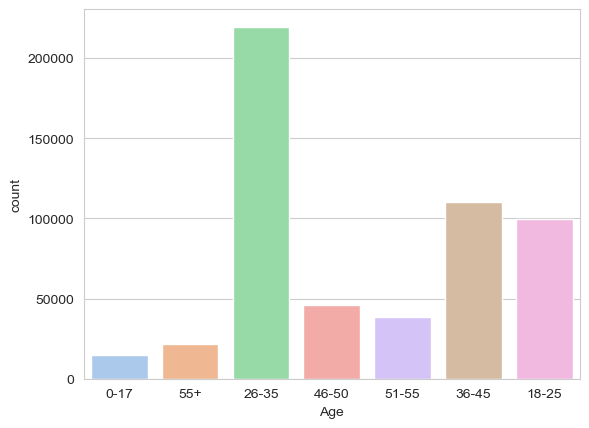

In [17]:
sns.countplot(data=df, x='Age')

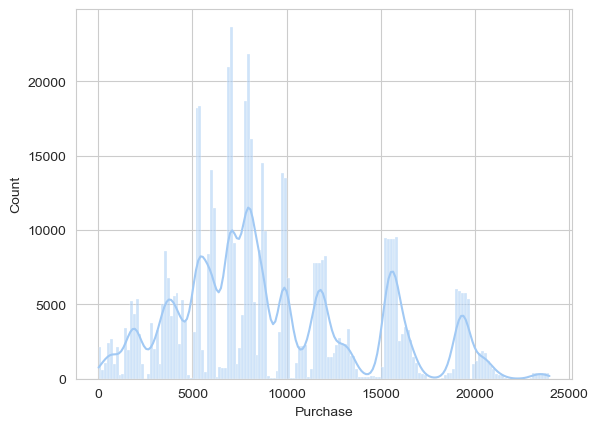

In [18]:
sns.histplot(df['Purchase'], kde=True)
plt.show()

<Axes: xlabel='Purchase'>

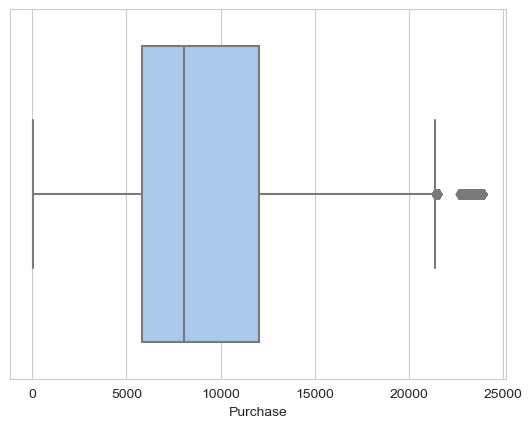

In [19]:
sns.boxplot(data=df, x='Purchase', orient='h')

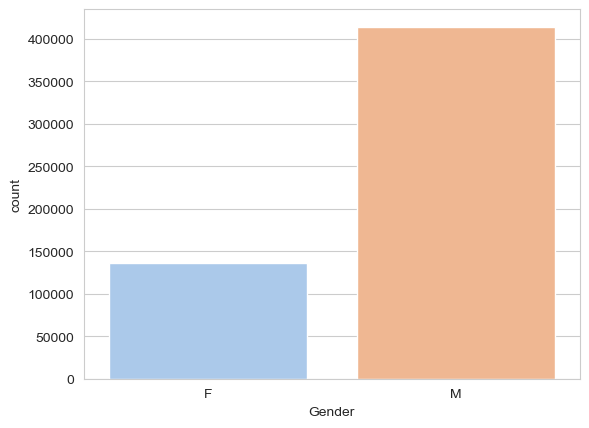

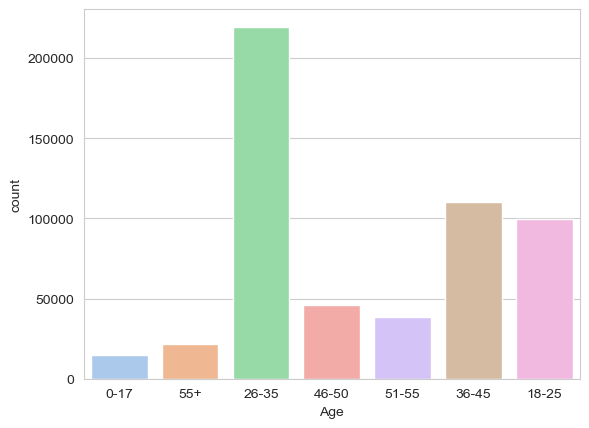

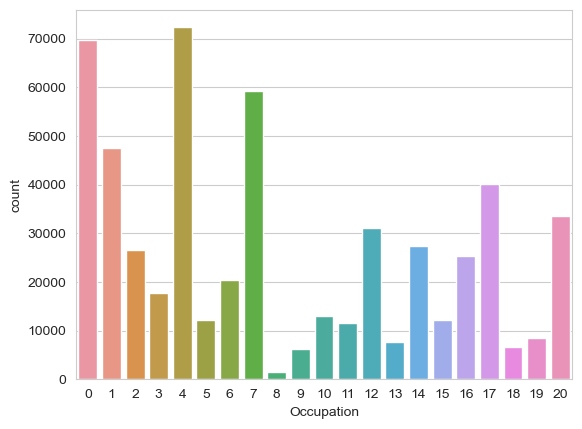

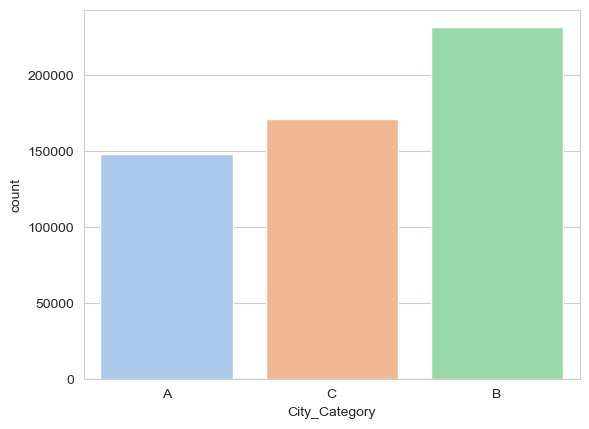

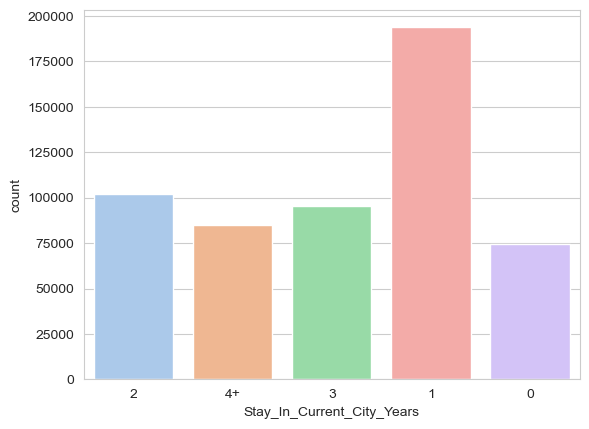

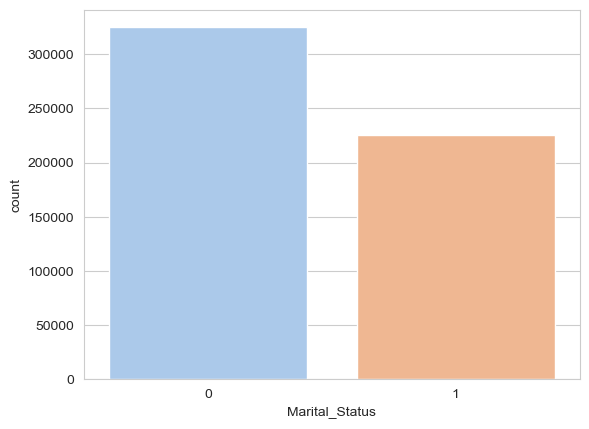

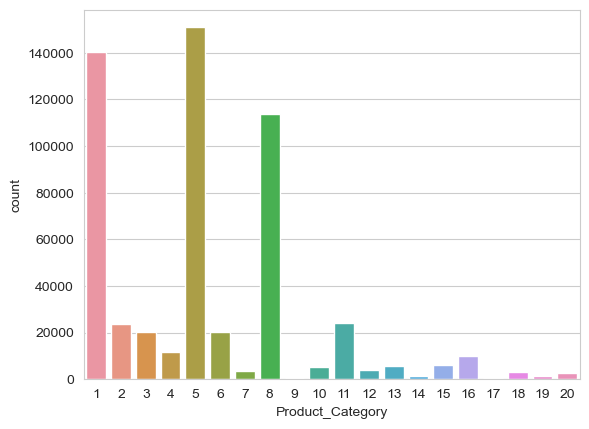

In [20]:
# fig, axs = plt.subplots(2,2, figsize=(20,16))
for i in categorical_cols:
    sns.countplot(data=df, x=i)
    plt.show()

**Observations**

    - Product Categories 1, 5 and 8 have highest purchasing frequency
    - More people are single(~60%) than married(~40%)
    - Most people have stayed in the current city for only 1 year
    - Most people live in city category B
    - Most people have occupations 0, 1, 4 and 7
    - Majority of the customers are Male

# Questions

## 1. Are women spending more money per transaction than men? Why or why not?

In [21]:
pd.crosstab(df['Gender'], df['Age'], values=df['Purchase'], aggfunc='sum')

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,42385978,205475842,442976233,243438963,116706864,89465997,45782765
M,92527205,708372833,1588794345,783130921,304136539,277633647,154984610


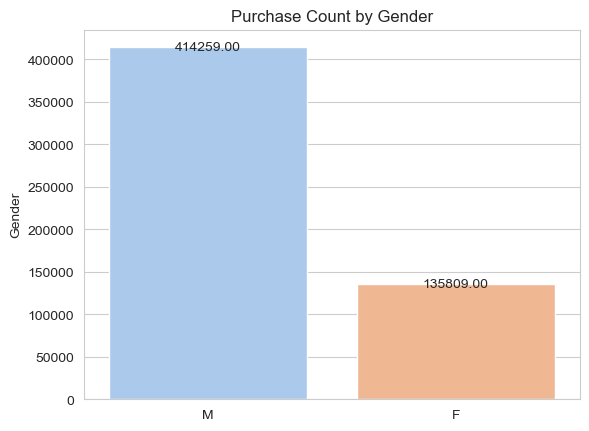

In [22]:
# purchase_count_by_gender = df.groupby('Gender').agg({'Purchase': 'count'})
ax = sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts())
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), ".2f"),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha="center", va="center")
plt.title("Purchase Count by Gender")
plt.show()

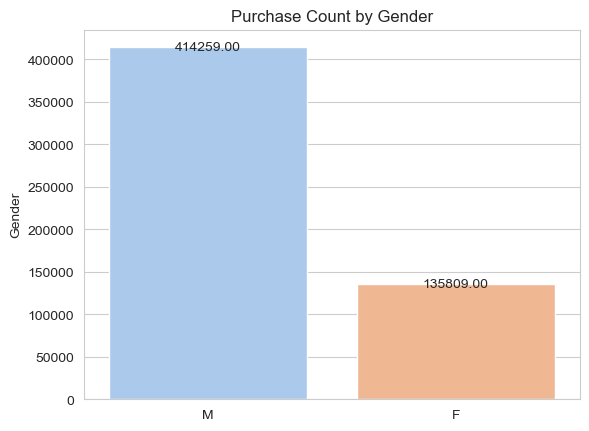

In [23]:
ax = sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts())
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), ".2f"),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha="center", va="center")
plt.title("Purchase Count by Gender")
plt.show()

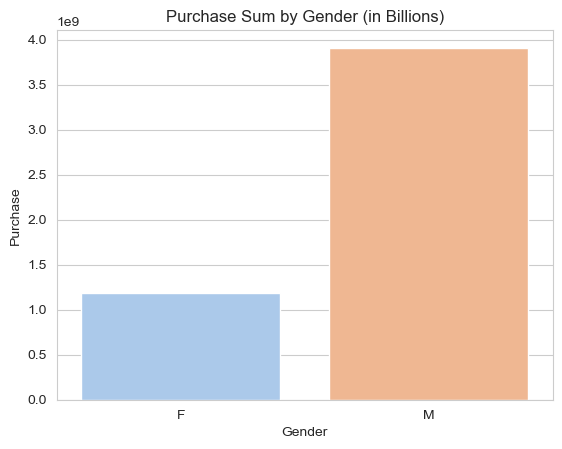

In [24]:
purchase_sum_by_gender = df.groupby('Gender').agg({'Purchase': 'sum'}).reset_index()
sns.barplot(data=purchase_sum_by_gender, x='Gender', y='Purchase')
plt.title('Purchase Sum by Gender (in Billions)')
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase'>

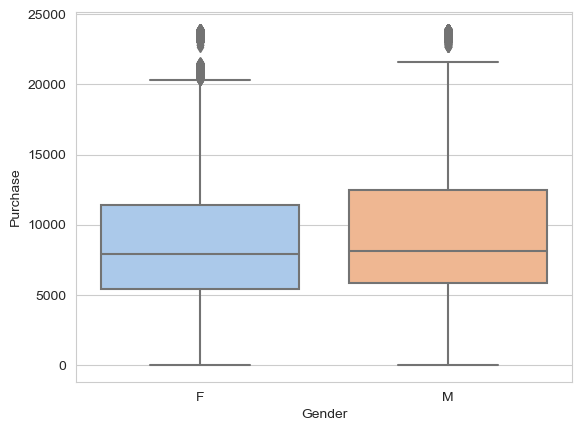

In [25]:
sns.boxplot(data=df, x='Gender', y='Purchase')

In [26]:
male_mean_spent = round(df[df['Gender']=='M']['Purchase'].mean(), 2)
print("Average amount spent by a male", male_mean_spent)


Average amount spent by a male 9437.53


In [27]:
female_mean_spent = round(df[df['Gender']=='F']['Purchase'].mean(), 2)
print("Average amount spent by a female", female_mean_spent)

Average amount spent by a female 8734.57


**Observations**

    - Overall and on average "Male" customers spent more than "Female" customers

## 2. Confidence Intervals and distributions of the mean of the expenses by female and male customers

In [28]:
male_df = df.loc[df['Gender']=='M', ['Gender', 'Purchase']].copy().reset_index(drop=True)
female_df = df.loc[df['Gender']=='F', ['Gender', 'Purchase']].copy().reset_index(drop=True)

In [29]:
n = 300 #sample_size
iterations = 1000

In [30]:
male_sample_means = [male_df.sample(n, replace=True)['Purchase'].mean() for i in range(iterations)]
female_sample_means = [female_df.sample(n, replace=True)['Purchase'].mean() for i in range(iterations)]

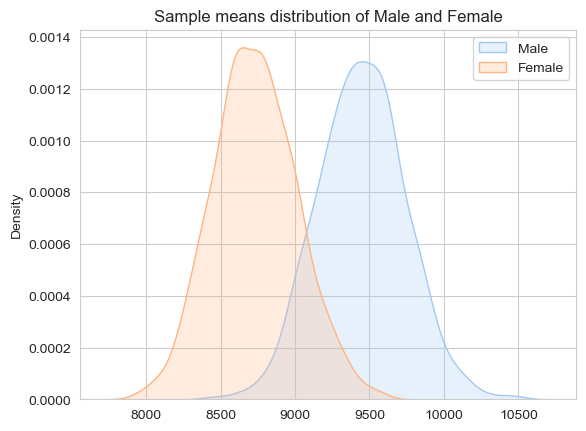

In [31]:
sns.kdeplot(male_sample_means, fill=True)
sns.kdeplot(female_sample_means, fill = True)
plt.title("Sample means distribution of Male and Female")
plt.legend(['Male', 'Female'])
plt.show()

In [32]:
# calculate z_score at 95%, lower limit at 0.025 percentile and upper limit at 0.975 percentile
z_score_lower = round(norm.ppf(0.025), 2)
z_score_upper = round(norm.ppf(0.975), 2)
print(f"Lower limit z-score {z_score_lower}")
print(f"Upper limit z-score {z_score_upper}")

Lower limit z-score -1.96
Upper limit z-score 1.96


**Confidence Interval Formula**

1. First we calculate Margin of error
    - ME = Z-score x (Std Dev/SQRT(n))
    - Where
        - Z-score = Z-score of the percentile of interval band
        - Std Dev = Standard deviation of population
        - n = Sample mean size
2. We calculate the lower and upper bounds of the interval
    - Lower Bound = Sample mean - ME
    - Upper Bound = Sample mean + ME

In [33]:
# Calculating Confidence Intervals
male_ci_lower = (sum(male_sample_means)/1000) + z_score_lower*(male_df['Purchase'].std()/(iterations)**0.5)
male_ci_upper = (sum(male_sample_means)/1000) + z_score_upper*(male_df['Purchase'].std()/(iterations)**0.5)
female_ci_lower = (sum(female_sample_means)/1000) + z_score_lower*(female_df['Purchase'].std()/(iterations)**0.5)
female_ci_upper = (sum(female_sample_means)/1000) + z_score_upper*(female_df['Purchase'].std()/(iterations)**0.5)
print(f'Confidence Interval at 95% of mean of Male sample means is ({round(male_ci_lower, 2)}, {round(male_ci_upper, 2)})')
print(f'Confidence Interval at 95% of mean of Female sample means is ({round(female_ci_lower, 2)}, {round(female_ci_upper, 2)})')

Confidence Interval at 95% of mean of Male sample means is (9130.51, 9761.74)
Confidence Interval at 95% of mean of Female sample means is (8435.13, 9026.08)


**Observations**

**Now we can infer about the population that, 95% of the times:**

1. Average amount spend by male customer will lie in between: (9130.51, 9761.74)
2. Average amount spend by female customer will lie in between: (8435.13, 9026.08)

## 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

***95% CI for mean amount spent by Male and Female customers:***
- Males: (9120.92, 9752.15)
- Females: (8449.08, 9040.04)
- We can conclude with 95% Confidence that the mean amount spent by Males and Females do not overlap
- Mean amount spent by males is more than that of females

***How can Walmart leverage the above data?***

- The above information is applicable to the entire population
- Thus Walmart should prioritize male customers during Black Friday as that ensures a higher chance of generating more revenue
- Products specifically catered to males can be launched during Black Friday
- We can also look at the historical data about the top performing products for males to get an idea about the product portfolio for future Black Friday sales
- Some incentives and discounts can also be announced for females to encourage them to make more purchases on the platform

## 4. Confidence Intervals for Married vs Unmarried

In [34]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [35]:
n_married = 3000 #sample_size
n_unmarried = 2000
iterations = 1000

In [36]:
married_df = df.loc[df['Marital_Status']==1, ['Marital_Status', 'Purchase']].copy().reset_index(drop=True)
unmarried_df = df.loc[df['Marital_Status']==0, ['Marital_Status', 'Purchase']].copy().reset_index(drop=True)

In [37]:
married_sample_means = [married_df.sample(n_married, replace=True)['Purchase'].mean() for i in range(iterations)]
unmarried_sample_means = [unmarried_df.sample(n_unmarried, replace=True)['Purchase'].mean() for i in range(iterations)]

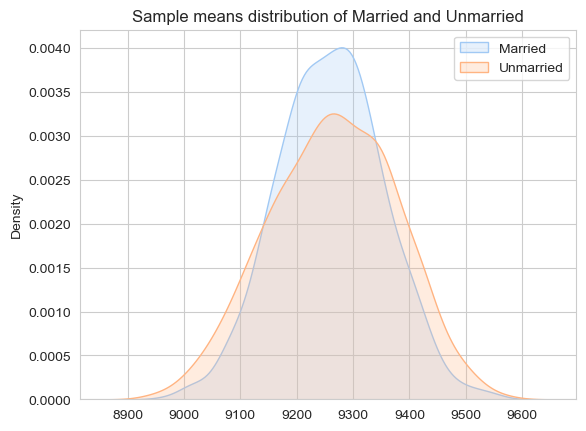

In [38]:
sns.kdeplot(married_sample_means, fill=True)
sns.kdeplot(unmarried_sample_means, fill=True)
plt.title("Sample means distribution of Married and Unmarried")
plt.legend(['Married', 'Unmarried'])
plt.show()

In [39]:
# Calculating Confidence Intervals
married_ci_lower = (sum(married_sample_means)/1000) + z_score_lower*(married_df['Purchase'].std()/(iterations)**0.5)
married_ci_upper = (sum(married_sample_means)/1000) + z_score_upper*(married_df['Purchase'].std()/(iterations)**0.5)
unmarried_ci_lower = (sum(unmarried_sample_means)/1000) + z_score_lower*(unmarried_df['Purchase'].std()/(iterations)**0.5)
unmarried_ci_upper = (sum(unmarried_sample_means)/1000) + z_score_upper*(unmarried_df['Purchase'].std()/(iterations)**0.5)
print(f'Confidence Interval at 95% of mean of Married sample means is ({round(married_ci_lower, 2)}, {round(married_ci_upper, 2)})')
print(f'Confidence Interval at 95% of mean of Unmarried sample means is ({round(unmarried_ci_lower, 2)}, {round(unmarried_ci_upper, 2)})')

Confidence Interval at 95% of mean of Married sample means is (8948.64, 9570.54)
Confidence Interval at 95% of mean of Unmarried sample means is (8952.55, 9575.75)


**Observations**

    - Confidence Interval at 95% of mean of Married sample means is (8948.64, 9570.54)
    - Confidence Interval at 95% of mean of Unmarried sample means is (8952.55, 9575.75)
    - Purchases of Married People vs Unmarried people are almost identical
    - Shopping habits of both kinds of people are similar

## 5. Confidence Intervals for Age

In [40]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [41]:
age_labels = df['Age'].value_counts().index
age_labels

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

In [42]:
n = 300 #sample_size
iterations = 1000

In [43]:
age_0_17 = df.loc[df['Age']=='', ['Age', 'Purchase']].copy().reset_index(drop=True)

In [49]:
age_dict = {key: [] for key in age_labels}

In [45]:
for k in age_dict.keys():
    age_dict[k].append(df.loc[df['Age']==k, ['Age', 'Purchase']].copy().reset_index(drop=True))

In [46]:
for k in age_dict.keys():
    sample_means = [age_dict[k][0].sample(n, replace=True)['Purchase'].mean() for i in range(iterations)]
    age_dict[k].append(sample_means)

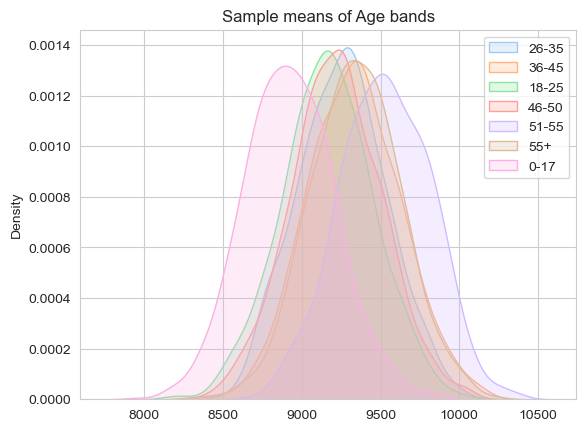

In [47]:
for k in age_dict.keys():
    sns.kdeplot(age_dict[k][1], fill=True)
plt.title("Sample means of Age bands")
plt.legend(age_dict.keys())
plt.show()

In [48]:
for k in age_dict.keys():
    ci_lower = (sum(age_dict[k][1])/1000) + z_score_lower*(age_dict[k][0]['Purchase'].std()/(iterations)**0.5)
    ci_upper = (sum(age_dict[k][1])/1000) + z_score_upper*(age_dict[k][0]['Purchase'].std()/(iterations)**0.5)
    print(f'Confidence Interval at 95% of mean of Age Band {k} sample means is ({round(ci_lower, 2)}, {round(ci_upper, 2)})')

Confidence Interval at 95% of mean of Age Band 26-35 sample means is (8941.24, 9562.35)
Confidence Interval at 95% of mean of Age Band 36-45 sample means is (9019.47, 9642.12)
Confidence Interval at 95% of mean of Age Band 18-25 sample means is (8849.54, 9473.6)
Confidence Interval at 95% of mean of Age Band 46-50 sample means is (8909.23, 9524.97)
Confidence Interval at 95% of mean of Age Band 51-55 sample means is (9210.81, 9841.45)
Confidence Interval at 95% of mean of Age Band 55+ sample means is (9030.1, 9651.33)
Confidence Interval at 95% of mean of Age Band 0-17 sample means is (8602.13, 9235.71)


**Observations**

    - Age Band 50-55 has highest mean purchase value with interval (9210.81, 9841.45)
    - Age Band 0-17 has lowest mean purchase value with interval (8602.13, 9235.71)

# Recommendations

	1. Promote product categories 1, 5, 8 since they are already a customer favorite and can fetch even higher revenues
	2. More male centric products can be added since males are the spending more and they make up about 75% of  total customers 
	3. Shipping should be improved to City category B since most of the customers live there
	4. We can also look at the historical data about the top performing products for males to get an idea about the product portfolio for future sales
	5. There is potential to increase spend by female customers since average spend is not too far behind male customers. Some incentives and female centric products can be introduced
    6. People of age group 50-55 are biggest spenders at Walmart. Discounts and products specific to this age group can be promoted